**The Objective here to find some interesting insights into a few movies released between 1916 and 2016.** 

1. Finding movies with highest profit and extracting the top 10 movies. 
2. Finding IMDB top 250 movies based on IMDB score. 
3. Finding the Foriegn movies listed in IMDB top 250 
4. Finding the best directors based on their IMDB score. 
5. Finding popular genres.
6. Finding the critic favourite and audience favorite actors. 

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [5]:
import numpy as np
import pandas as pd

movies = pd.read_csv("Movie+Assignment+Data.csv") # Write your code for importing the csv file here
movies.head() ##top 5 rows

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [6]:
# Write your code for inspection here
movies.info() ##all meta data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
movies.describe() ##mean/median/mode of all columns

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [8]:
original = movies.shape ##no. of rows and columns
print(original)

(5043, 28)


In [9]:
movies.columns ##column names 

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [10]:
movies.dtypes ##datatype  

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values


In [11]:
# Write your code for column-wise null count here
movies.isnull().sum() 

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [12]:
# Write your code for row-wise null count here
movies.isnull().sum(axis = 1)

0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [13]:
# Write your code for column-wise null percentages here
round(100*(movies.isnull().sum()/len(movies.index)),2) ##rounding it up to 2

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [14]:
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operation
movies = movies.drop(['director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name',
             'cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating','country',
             'movie_imdb_link','aspect_ratio','plot_keywords','color'],axis = 1)
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,7.1,0


In [15]:
movies.shape

(5043, 13)

-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages


In [16]:
# Write your code for dropping the rows here

round(100*(movies.isnull().sum()/len(movies.index)),2)

director_name              2.06
num_critic_for_reviews     0.99
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [17]:
##to drop rows with more than 5% null val
movies = movies.dropna(how = 'any', subset=['gross','budget']) ##drops all rows with NA values in gross and budget
round(100*(movies.isnull().sum()/len(movies.index)),2) ##taking percentage to check 

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

-  ### Subtask 2.4: Fill NaN values

The `language` column has some NaN values. Here, on inspection, it is seen that it is safe to replace all the missing values with `'English'`.

In [18]:
# Write your code for filling the NaN values in the 'language' column here
movies["language"].fillna("English", inplace = True) 
movies.head()


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000


-  ### Subtask 2.5: Check the number of retained rows

Two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. They can be ignored.

In [19]:
## checking number of retained rows here
new = movies.shape
print(new)
percent = new[0]/original[0]
print(percent) ##to check if the percentage of rows retained is 77%

(3891, 13)
0.7715645449137418


**Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Converting the unit of the `budget` and `gross` columns from `$` to `million $`.

In [20]:
# Write your code for unit conversion here
movies['budget'] = movies['budget'].apply(lambda x : x//1000000) #applying division by 1 lakh to all values of budget and gross
movies['gross'] = movies['gross'].apply(lambda x : x//1000000)
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0,2007.0,7.1,0
2,Sam Mendes,602.0,200.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.0,2012.0,6.6,24000


-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [21]:
# code for creating the profit column here
movies['Profit'] = movies['gross']-movies['budget'] ##new column profit
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.0
1,Gore Verbinski,302.0,309.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0,2007.0,7.1,0,9.0
2,Sam Mendes,602.0,200.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0,2015.0,6.8,85000,-45.0
3,Christopher Nolan,813.0,448.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0,2012.0,8.5,164000,198.0
5,Andrew Stanton,462.0,73.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.0,2012.0,6.6,24000,-190.0


In [22]:
#  code for sorting the dataframe here
movies = movies.sort_values(['Profit'],ascending = False) ##sort in profit descending order
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.0
29,Colin Trevorrow,644.0,652.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.0
26,James Cameron,315.0,658.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.0
3024,George Lucas,282.0,460.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.0
3080,Steven Spielberg,215.0,434.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.0,1982.0,7.9,34000,424.0


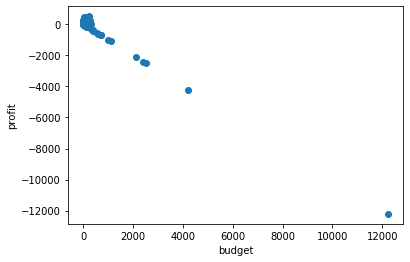

In [23]:
# code for profit vs budget plot here
import matplotlib.pyplot as plt 
import seaborn as sns 


plt.xlabel('budget') #naming x as budget
plt.ylabel('profit') #naming y as profit


plt.scatter(x='budget',y='Profit',data = movies)

In [24]:
top10 = movies.iloc[:10,:] #  code to get the top 10 profiting movies 
top10


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.0
29,Colin Trevorrow,644.0,652.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.0
26,James Cameron,315.0,658.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.0
3024,George Lucas,282.0,460.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.0
3080,Steven Spielberg,215.0,434.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.0,1982.0,7.9,34000,424.0
794,Joss Whedon,703.0,623.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.0
17,Joss Whedon,703.0,623.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.0
509,Roger Allers,186.0,422.0,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.0
240,George Lucas,320.0,474.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.0
66,Christopher Nolan,645.0,533.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.0


-  ### Subtask 3.3: Drop duplicate values

In [25]:
# Write your code for dropping duplicate values here
movies.drop_duplicates(inplace = True)
movies.head()


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.0
29,Colin Trevorrow,644.0,652.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.0
26,James Cameron,315.0,658.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.0
3024,George Lucas,282.0,460.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.0
3080,Steven Spielberg,215.0,434.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.0,1982.0,7.9,34000,424.0


In [26]:
# code for repeating subtask 2 here
movies['Profit'] = movies['gross']-movies['budget']
movies = movies.sort_values(['Profit'],ascending = False)
top10 = movies.iloc[:10,:] # Write your code to get the top 10 profiting movies 
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.0
29,Colin Trevorrow,644.0,652.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.0
26,James Cameron,315.0,658.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.0
3024,George Lucas,282.0,460.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.0
3080,Steven Spielberg,215.0,434.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.0,1982.0,7.9,34000,424.0
794,Joss Whedon,703.0,623.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.0
509,Roger Allers,186.0,422.0,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.0
240,George Lucas,320.0,474.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.0
66,Christopher Nolan,645.0,533.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.0
439,Gary Ross,673.0,407.0,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,329.0


There are two movies directed by `James Cameron` in the list.

-  ### Subtask 3.4: Find IMDb Top 250

In [27]:
# code for extracting the top 250 movies as per the IMDb score here and stored it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'

IMDb_Top_250_df = movies[movies['num_voted_users'] > 25000]
IMDb_Top_250_df = IMDb_Top_250_df.sort_values(by = 'imdb_score',ascending = False)
IMDb_Top_250 = IMDb_Top_250_df.iloc[:250,:] ##extracting top 250 films 
IMDb_Top_250['Rank'] = np.arange(1,251) #adding a rank column
IMDb_Top_250.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Rank
1937,Frank Darabont,199.0,28.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144.0,English,25.0,1994.0,9.3,108000,3.0,1
3466,Francis Ford Coppola,208.0,134.0,Crime|Drama,Al Pacino,The Godfather,1155770,2238.0,English,6.0,1972.0,9.2,43000,128.0,2
66,Christopher Nolan,645.0,533.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.0,3
2837,Francis Ford Coppola,149.0,57.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650.0,English,13.0,1974.0,9.0,14000,44.0,4
1874,Steven Spielberg,174.0,96.0,Biography|Drama|History,Liam Neeson,Schindler's List,865020,1273.0,English,22.0,1993.0,8.9,41000,74.0,5


In [28]:
Top_Foreign_Lang_Film = IMDb_Top_250.loc[IMDb_Top_250['language'] != 'English', :] # Write your code to extract top foreign language films from 'IMDb_Top_250' here
Top_Foreign_Lang_Film

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Rank
4498,Sergio Leone,181.0,6.0,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780.0,Italian,1.0,1966.0,8.9,20000,5.0,8
4029,Fernando Meirelles,214.0,7.0,Crime|Drama,Alice Braga,City of God,533200,749.0,Portuguese,3.0,2002.0,8.7,28000,4.0,17
4747,Akira Kurosawa,153.0,0.0,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596.0,Japanese,2.0,1954.0,8.7,11000,-2.0,18
2373,Hayao Miyazaki,246.0,10.0,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902.0,Japanese,19.0,2001.0,8.6,28000,-9.0,23
4921,Majid Majidi,46.0,0.0,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130.0,Persian,0.0,1997.0,8.5,0,0.0,35
4259,Florian Henckel von Donnersmarck,215.0,11.0,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407.0,German,2.0,2006.0,8.5,39000,9.0,39
4105,Chan-wook Park,305.0,2.0,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809.0,Korean,3.0,2003.0,8.4,43000,-1.0,48
1329,S.S. Rajamouli,44.0,6.0,Action|Adventure|Drama|Fantasy|War,Tamannaah Bhatia,Baahubali: The Beginning,62756,410.0,Telugu,18.0,2015.0,8.4,21000,-12.0,49
4659,Asghar Farhadi,354.0,7.0,Drama|Mystery,Shahab Hosseini,A Separation,151812,264.0,Persian,0.0,2011.0,8.4,48000,7.0,51
2323,Hayao Miyazaki,174.0,2.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570.0,Japanese,2400.0,1997.0,8.4,11000,-2398.0,52


- ### Subtask 3.5: Find the best directors


In [29]:
# code for extracting the top 10 directors here

director = movies.groupby('director_name')['imdb_score'].mean() ##groupby director name and mean of imdb 
director = np.round(director,1) ##to reduce the number of decimals as that of IMDB score 
director = director.reset_index() #dataframe
director.sort_values(by=['imdb_score','director_name'],ascending = [False, True], inplace= True) #first descending sort by imdb and then ascending sort by director name
top10director = director[:10]
top10director

,director_name,imdb_score
216,Charles Chaplin,8.6
1675,Tony Kaye,8.6
45,Alfred Hitchcock,8.5
302,Damien Chazelle,8.5
1017,Majid Majidi,8.5
1440,Ron Fricke,8.5
103,Asghar Farhadi,8.4
260,Christopher Nolan,8.4
1035,Marius A. Markevicius,8.4
1371,Richard Marquand,8.4


 `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

In [30]:
#code for extracting the first two genres of each movie here
x = movies['genres'].str.split('|') #string split
movies['Genre_1'] = x.str.get(0) #giving the first genre to genre_1
movies['Genre_2'] = x.str.get(1) #assigning the second genre to genre_2
movies.Genre_2.fillna(movies.Genre_1, inplace=True) ##whenever NAN in genre_2, fill it with genre_1
movies.head(300)


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Genre_1,Genre_2
0,James Cameron,723.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.0,Action,Adventure
29,Colin Trevorrow,644.0,652.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.0,Action,Adventure
26,James Cameron,315.0,658.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.0,Drama,Romance
3024,George Lucas,282.0,460.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.0,Action,Adventure
3080,Steven Spielberg,215.0,434.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.0,1982.0,7.9,34000,424.0,Family,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,Norman Ferguson,105.0,84.0,Animation|Family|Fantasy|Musical,Mel Blanc,Pinocchio,90360,147.0,English,2.0,1940.0,7.5,0,82.0,Animation,Family
4052,Tod Williams,264.0,84.0,Horror,Sprague Grayden,Paranormal Activity 2,82133,359.0,English,3.0,2010.0,5.7,14000,81.0,Horror,Horror
287,Tim Burton,230.0,180.0,Action|Adventure|Sci-Fi|Thriller,Cary-Hiroyuki Tagawa,Planet of the Apes,177725,1368.0,English,100.0,2001.0,5.7,0,80.0,Action,Adventure
10,Zack Snyder,673.0,330.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,3018.0,English,250.0,2016.0,6.9,197000,80.0,Action,Adventure


In [31]:
movies_by_segment = movies.groupby(['Genre_1','Genre_2'])['gross'].mean()
movies_by_segment.sort_values(ascending=False, inplace=True) # Write your code for grouping the dataframe here

In [32]:
PopGenre = movies_by_segment.iloc[:5] 
PopGenre# code for getting the 5 most popular combo of genres here

Genre_1    Genre_2  
Family     Sci-Fi       434.000000
Adventure  Sci-Fi       228.000000
           Family       118.411765
           Animation    116.547009
Action     Adventure    109.182039
Name: gross, dtype: float64

`Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Creating three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. 
    2. Appending the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.

In [33]:
# Write your code for creating three new dataframes here

Meryl_Streep = movies[movies['actor_1_name'] == 'Meryl Streep']# Include all movies in which Meryl_Streep is the lead
Meryl_Streep

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Genre_1,Genre_2
1408,David Frankel,208.0,124.0,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,631.0,English,35.0,2006.0,6.8,0,89.0,Comedy,Drama
1575,Sydney Pollack,66.0,87.0,Biography|Drama|Romance,Meryl Streep,Out of Africa,52339,200.0,English,31.0,1985.0,7.2,0,56.0,Biography,Drama
1204,Nora Ephron,252.0,94.0,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,277.0,English,40.0,2009.0,7.0,13000,54.0,Biography,Drama
1618,David Frankel,234.0,63.0,Comedy|Drama|Romance,Meryl Streep,Hope Springs,34258,178.0,English,30.0,2012.0,6.3,0,33.0,Comedy,Drama
410,Nancy Meyers,187.0,112.0,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,214.0,English,85.0,2009.0,6.6,0,27.0,Comedy,Drama
2781,Phyllida Lloyd,331.0,29.0,Biography|Drama|History,Meryl Streep,The Iron Lady,82327,350.0,English,13.0,2011.0,6.4,18000,16.0,Biography,Drama
1925,Stephen Daldry,174.0,41.0,Drama|Romance,Meryl Streep,The Hours,102123,660.0,English,25.0,2002.0,7.6,0,16.0,Drama,Romance
3135,Robert Altman,211.0,20.0,Comedy|Drama|Music,Meryl Streep,A Prairie Home Companion,19655,280.0,English,10.0,2006.0,6.8,683,10.0,Comedy,Drama
1106,Curtis Hanson,42.0,46.0,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,69.0,English,45.0,1994.0,6.3,0,1.0,Action,Adventure
1674,Carl Franklin,64.0,23.0,Drama,Meryl Streep,One True Thing,9283,112.0,English,30.0,1998.0,7.0,592,-7.0,Drama,Drama


In [32]:
Leo_Caprio = movies[movies['actor_1_name'] == 'Leonardo DiCaprio']# Include all movies in which Leo_Caprio is the lead
Leo_Caprio

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Genre_1,Genre_2
26,James Cameron,315.0,658.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.0,Drama,Romance
97,Christopher Nolan,642.0,292.0,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,2803.0,English,160.0,2010.0,8.8,175000,132.0,Action,Adventure
911,Steven Spielberg,194.0,164.0,Biography|Crime|Drama,Leonardo DiCaprio,Catch Me If You Can,525801,667.0,English,52.0,2002.0,8.0,15000,112.0,Biography,Crime
296,Quentin Tarantino,765.0,162.0,Drama|Western,Leonardo DiCaprio,Django Unchained,955174,1193.0,English,100.0,2012.0,8.5,199000,62.0,Drama,Western
179,Alejandro G. Iñárritu,556.0,183.0,Adventure|Drama|Thriller|Western,Leonardo DiCaprio,The Revenant,406020,1188.0,English,135.0,2015.0,8.1,190000,48.0,Adventure,Drama
452,Martin Scorsese,490.0,127.0,Mystery|Thriller,Leonardo DiCaprio,Shutter Island,786092,964.0,English,80.0,2010.0,8.1,53000,47.0,Mystery,Thriller
361,Martin Scorsese,352.0,132.0,Crime|Drama|Thriller,Leonardo DiCaprio,The Departed,873649,2054.0,English,90.0,2006.0,8.5,29000,42.0,Crime,Drama
50,Baz Luhrmann,490.0,144.0,Drama|Romance,Leonardo DiCaprio,The Great Gatsby,362912,753.0,English,105.0,2013.0,7.3,115000,39.0,Drama,Romance
3476,Baz Luhrmann,490.0,144.0,Drama|Romance,Leonardo DiCaprio,The Great Gatsby,362933,753.0,English,105.0,2013.0,7.3,115000,39.0,Drama,Romance
2757,Baz Luhrmann,106.0,46.0,Drama|Romance,Leonardo DiCaprio,Romeo + Juliet,167750,506.0,English,14.0,1996.0,6.8,10000,32.0,Drama,Romance


In [33]:
Brad_Pitt = movies[movies['actor_1_name'] == 'Brad Pitt']# Include all movies in which Brad_Pitt is the lead
Brad_Pitt

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Genre_1,Genre_2
400,Steven Soderbergh,186.0,183.0,Crime|Thriller,Brad Pitt,Ocean's Eleven,402645,845.0,English,85.0,2001.0,7.8,0,98.0,Crime,Thriller
255,Doug Liman,233.0,186.0,Action|Comedy|Crime|Romance|Thriller,Brad Pitt,Mr. & Mrs. Smith,348861,798.0,English,120.0,2005.0,6.5,0,66.0,Action,Comedy
940,Neil Jordan,120.0,105.0,Drama|Fantasy|Horror,Brad Pitt,Interview with the Vampire: The Vampire Chroni...,239752,406.0,English,60.0,1994.0,7.6,11000,45.0,Drama,Fantasy
470,David Ayer,406.0,85.0,Action|Drama|War,Brad Pitt,Fury,303185,701.0,English,68.0,2014.0,7.6,82000,17.0,Action,Drama
254,Steven Soderbergh,198.0,125.0,Crime|Thriller,Brad Pitt,Ocean's Twelve,284852,627.0,English,110.0,2004.0,6.4,0,15.0,Crime,Thriller
2204,Alejandro G. Iñárritu,285.0,34.0,Drama,Brad Pitt,Babel,243799,908.0,English,25.0,2006.0,7.5,0,9.0,Drama,Drama
2682,Andrew Dominik,414.0,14.0,Crime|Thriller,Brad Pitt,Killing Them Softly,111625,369.0,English,15.0,2012.0,6.2,20000,-1.0,Crime,Thriller
2898,Tony Scott,122.0,12.0,Action|Crime|Drama|Romance|Thriller,Brad Pitt,True Romance,163492,460.0,English,13.0,1993.0,8.0,15000,-1.0,Action,Crime
2333,Angelina Jolie Pitt,131.0,0.0,Drama|Romance,Brad Pitt,By the Sea,7976,61.0,English,10.0,2015.0,5.3,0,-10.0,Drama,Romance
1490,Terrence Malick,584.0,13.0,Drama|Fantasy,Brad Pitt,The Tree of Life,136367,975.0,English,32.0,2011.0,6.7,39000,-19.0,Drama,Fantasy


In [34]:
# Write your code for combining the three dataframes here
new = Meryl_Streep.append(Leo_Caprio)
Combined = new.append(Brad_Pitt)
Combined

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Genre_1,Genre_2
1408,David Frankel,208.0,124.0,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,631.0,English,35.0,2006.0,6.8,0,89.0,Comedy,Drama
1575,Sydney Pollack,66.0,87.0,Biography|Drama|Romance,Meryl Streep,Out of Africa,52339,200.0,English,31.0,1985.0,7.2,0,56.0,Biography,Drama
1204,Nora Ephron,252.0,94.0,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,277.0,English,40.0,2009.0,7.0,13000,54.0,Biography,Drama
1618,David Frankel,234.0,63.0,Comedy|Drama|Romance,Meryl Streep,Hope Springs,34258,178.0,English,30.0,2012.0,6.3,0,33.0,Comedy,Drama
410,Nancy Meyers,187.0,112.0,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,214.0,English,85.0,2009.0,6.6,0,27.0,Comedy,Drama
2781,Phyllida Lloyd,331.0,29.0,Biography|Drama|History,Meryl Streep,The Iron Lady,82327,350.0,English,13.0,2011.0,6.4,18000,16.0,Biography,Drama
1925,Stephen Daldry,174.0,41.0,Drama|Romance,Meryl Streep,The Hours,102123,660.0,English,25.0,2002.0,7.6,0,16.0,Drama,Romance
3135,Robert Altman,211.0,20.0,Comedy|Drama|Music,Meryl Streep,A Prairie Home Companion,19655,280.0,English,10.0,2006.0,6.8,683,10.0,Comedy,Drama
1106,Curtis Hanson,42.0,46.0,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,69.0,English,45.0,1994.0,6.3,0,1.0,Action,Adventure
1674,Carl Franklin,64.0,23.0,Drama,Meryl Streep,One True Thing,9283,112.0,English,30.0,1998.0,7.0,592,-7.0,Drama,Drama


In [35]:
# Write your code for grouping the combined dataframe here
group = Combined.groupby('actor_1_name')

In [36]:
# Write the code for finding the mean of critic reviews and audience reviews here
mean_reviews = Combined.groupby('actor_1_name').agg({'num_user_for_reviews':'mean','num_critic_for_reviews':'mean'}) ##aggregating by mean of num_user and num_critic
mean_reviews.sort_values(by=['num_user_for_reviews','num_critic_for_reviews'],ascending = [False, False])

,num_user_for_reviews,num_critic_for_reviews
actor_1_name,,
Leonardo DiCaprio,914.476190,330.190476
Brad Pitt,742.352941,245.000000
Meryl Streep,297.181818,181.454545


**Checkpoint 6:** `Leonardo` has aced both the lists!

In [37]:
# Write the code for calculating decade here   
movies['decade'] = (movies['title_year'] - movies['title_year']%10) ##1920 = 1923 - 1923%10
movies['decade']= movies['decade'].astype('int') ##chnaging from float to int
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Genre_1,Genre_2,decade
0,James Cameron,723.0,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.0,Action,Adventure,2000
29,Colin Trevorrow,644.0,652.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.0,Action,Adventure,2010
26,James Cameron,315.0,658.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.0,Drama,Romance,1990
3024,George Lucas,282.0,460.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.0,Action,Adventure,1970
3080,Steven Spielberg,215.0,434.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.0,1982.0,7.9,34000,424.0,Family,Sci-Fi,1980


In [38]:
# Write your code for creating the data frame df_by_decade here 
df_by_decade = movies[['decade','num_voted_users']]
df_by_decade.groupby('decade')['num_voted_users'].sum()

decade
1920       116392
1930       804839
1940       230838
1950       678336
1960      2983442
1970      8524102
1980     19987476
1990     69735679
2000    170908676
2010    120640994
Name: num_voted_users, dtype: int64

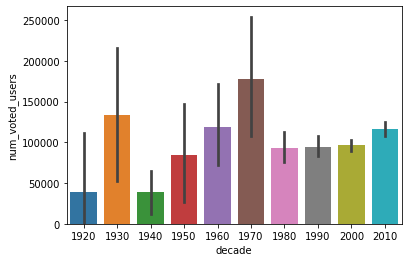

In [39]:
# Write your code for plotting number of voted users vs decade
sns.barplot(data= df_by_decade, x = 'decade', y = 'num_voted_users') 